## Analyzing music frequencies over time
Andrew Caietti, Asha Silva, Kelton Berry, Monica Alicea


# Introduction
This final project focuses on analyzing the differences in the time series of three songs from three different time periods. The first song, Ave Verum Corpus by The Choir of Liverpool Metropolitan Cathedral, was written in the summer of 1791 by Mozart. It is a Eucharistic chant that originates from the 13th century, and is historically used for the consecration during mass. Ave Verum Corpus was written for Anton Stoll, the choirmaster of Baden, for the Roman Catholic Holiday, the Feast of Corpus Christi (“Ave verum corpus (Mozart)”). This song is different from Mozart's other pieces in that it is less dramatic (Schwarm, “Ave Verum Corpus, K 618”). Specifically, this version of Ave Verum Corpus is sung by the Liverpool Metropolitan Cathedral’s choir accompanied by the organ.   

The second song, Hotel California by the Eagles was composed in early 1976 and was released later that year in December. It was the title track of the Eagles album Hotel California and reached the top spot of the Billboard Hot 100 music chart. The song was written by band members Don Felder, Don Henley and Glenn Frey and is widely considered the Eagles most successful song. Although its meaning is often a topic of debate, Henley has stated that the song is “our interpretation of the high life in Los Angeles” (“500 Greatest Songs of All Time”).  The song features vocals, drums, percussion, acoustic, bass, and, most notably, electric guitar (Philpot, “The Eagles’ ‘Hotel California’ Song Analysis”).
   
The final song, Levitating by Dua Lipa featuring DaBaby was released in 2020. As the third single on Grammy-award winning album “Future Nostalgia”, the recently popularized Levitating has been praised by pop listeners as one of 2021’s greatest hits (Ahlgrim 2020). The song combines pop with the newer genres of electro-disco and nu-disco; two disco tropes that use electronic, synthesizer-heavy sounds to modernize the 70’s music trend (“Levitating (song)”). While the song looks to influences from 70’s and 80’s music, its use of digital instruments and a heavy bass, as well as its highly-produced nature, makes Levitating uniquely reflective of today’s pop music standards. 
By analyzing the audio files as time series, the spectra and periodograms of these three songs reveal how song frequencies have changed over time, as well as how they differ cross-genre. 


### **Audio File Statistics**


| Audio File | Number of Samples | Sampling Frequency | Hertz Range |
| ---------- | ------------------ | --------------- | ----------- | 
| Ave Verum Corpus | 9890880 | 44,100 | 0 - 16,000 |
| Hotel California | 17263872 | 44,100 | 0 - 22,000 |
| Levitating |8916864 | 44,100 | 0 - 22,000 |


# Methodology

## **Downloading the Files**
The three audio files were originally downloaded from TIDAL (TIDAL), a music streaming platform as .flac using Tidal-gui (Yaronzz,“Tidal-Gui”). The GUI required a TIDAL account, to which a group member had a subscription for. The Tidal-GUI produced high-fidelity audio files, with a 44100hz sampling rate. These audio files were stored locally as a Free Lossless Audio Codec, or .flac, file. Then, each audio file was converted to .mp3 format, as outlined in the section below.


## **Converting the Audio Files**
To read audio files into R, the tuneR package (Uwe Ligges, tuneR) requires they be .mp3 format. After downloading the files in .flac, they were converted to .mp3 through a cloud-based .flac to .mp3 converter, called cloudconvert (“FLAC to MP3 Converter”). Since .flac is a lossless format, converting the files into the .mp3 format ended up decreasing the overall audio quality of each file. This is because .mp3 is not lossless, where the audio files are cut down to fit in the .mp3 format. To better understand what audio is lost, each song is visualized in a spectrogram through spek (Kojevnikov, “Spek”). The .mp3 version of the file is on the left while the .flac version of the file is on the right of each image.

### Ave Verum Corpus
![ave_spect](https://raw.githubusercontent.com/caiettia/Thesis-Project/main/music_analysis/ave_spectrogram_diff.png)
For Ave Verum Corpus, the spectrograms demonstrate some audio loss at mid to high frequencies, with a majority of the audio being lost at the highest frequencies. This can be seen especially well with the cut-off of data beyond 16khz throughout the entire audio file. Also visible is some thining out of higher hertz portions of the song, especially around the three minute mark where different high-frequency peaks are much thinner in the .mp3 file relative to the .flac file. This sort of line on the spectrogram at 16khz is indicative of a "buzz," meaning the audio file has some sort of audio-pollution from something unrelated to the song itself (i.e something in the room could have been making a high-pitch noise that was picked up by the recording equipment). 

### Hotel California
![eagles_spect](https://raw.githubusercontent.com/caiettia/Thesis-Project/main/music_analysis/eagles_spectrogram_diff.png)
For Hotel California, the spectrograms reveal some background audio that is capped at the 16khz point similar to Ave Verum Corpus. Despite this, some of the higher hertz portions of the song are still kept. 

### Levitating
![dua_spect](https://raw.githubusercontent.com/caiettia/Thesis-Project/main/music_analysis/levitating_spectrogram_diff.png)
Lastly, for Levitating, the spectrograms demonstrate similar loss of background audio that is cut past the 16khz mark. Also, some of the audio past the 20khz mark is cut down as a part of the compression process. 


From these spectrograms, it is clear that the .mp3 file format presents some loss of audio in each of the files. Notably, the 16khz mark seems to be a threshold where audio is cut beyond this point. 


## **Reading the Data**
After coverting the audio files to the .mp3 format, each song was read into an R kernel Google Colab notebook using the tuneR package (Uwe Ligges, tuneR). 

In [ ]:
install.packages("tuneR", dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘signal’, ‘pastecs’




In [ ]:
library("tuneR")

In [ ]:
# Download audio file to our cloud server
mp3_eagles <- "/content/Eagles.mp3"
mp3_ave <- "/content/Ave.mp3"
mp3_levitating <- "/content/Levitating.mp3"

# Read in MP3 file
my_mp3_eagles <- readMP3(mp3_eagles)
my_mp3_ave <- readMP3(mp3_ave)
my_mp3_levitating <- readMP3(mp3_levitating)

## **Handling Stereo Sound**
The first challenge addressed was how to handle the two-channels of audio that each song has. For purposes of this project, we decided to isolate the left audio channel, as this is a common practice when analyzing audio files with multiple channels. This can be seen in our code when we define the raw variables for each song: ‘ave’, ‘eagles’, ‘levit’ and is also indicated by the comment highlighting this. 

In [ ]:
# Check audio length (convert seconds to minutes)
num_samples_ave <- length(my_mp3_ave@left)
num_samples_ave / my_mp3_ave@samp.rate / 60

[1] 3.73805

In [ ]:
num_samples_eagles <- length(my_mp3_eagles@left)
num_samples_eagles / my_mp3_eagles@samp.rate / 60

[1] 6.524517

In [ ]:
num_samples_levitating <- length(my_mp3_levitating@left)
num_samples_levitating / my_mp3_levitating@samp.rate / 60

[1] 3.369941

In [ ]:
# Pull only the left audio channel
ave <- my_mp3_ave@left
eagles <- my_mp3_eagles@left
levit <- my_mp3_levitating@left

After isolating the left audio channel, vectors were created to isolate the sound pressure values. Then the audio files were downsampled by 1/16 of the original vector. 

In [ ]:
m1_ave <- ave / 2^(my_mp3_ave@bit - 1)
m1_eagles <- eagles / 2^(my_mp3_eagles@bit - 1)
m1_levit <- levit / 2^(my_mp3_levitating@bit - 1)

## **Plotting a Time Representation**

Finally, arrays with each song's time points were created and then plotted the sound pressue values in an Amplitude versus Time (seconds) graph. This illustrated the tone of each song over time.

In [ ]:
my_time_ave <- (0:(num_samples_ave - 1)) / my_mp3_ave@samp.rate
my_time_eagles <- (0:(num_samples_eagles - 1)) / my_mp3_eagles@samp.rate
my_time_levitating <- (0:(num_samples_levitating - 1)) / my_mp3_levitating@samp.rate

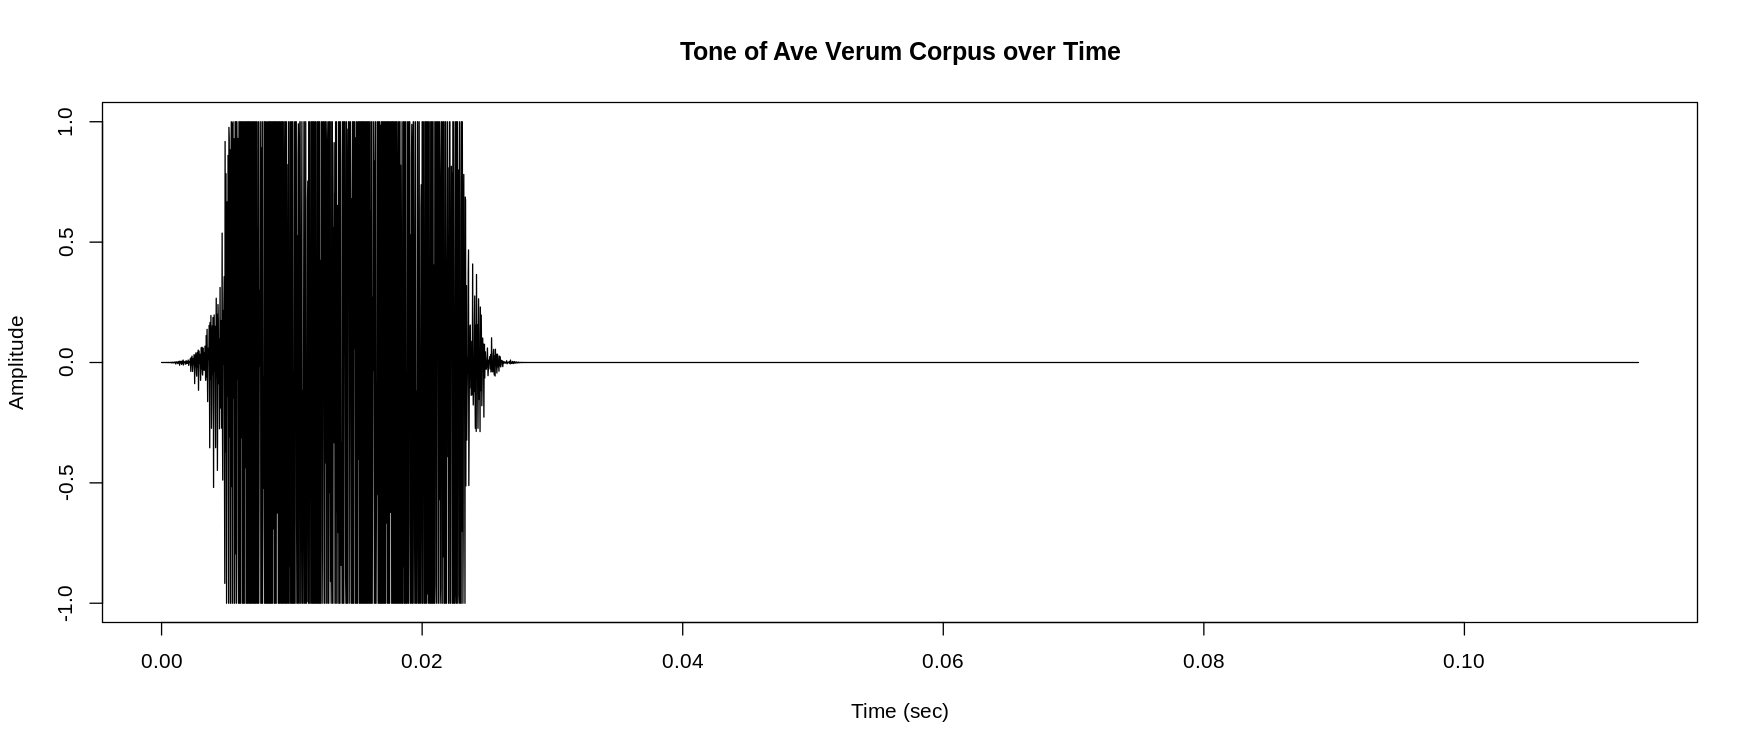

In [ ]:
# Looking at the just the first few samples
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(my_time_ave[1:5000], m1_ave[1:5000], type='l', col='black', xlab='Time (sec)', ylab='Amplitude', main = "Tone of Ave Verum Corpus over Time")

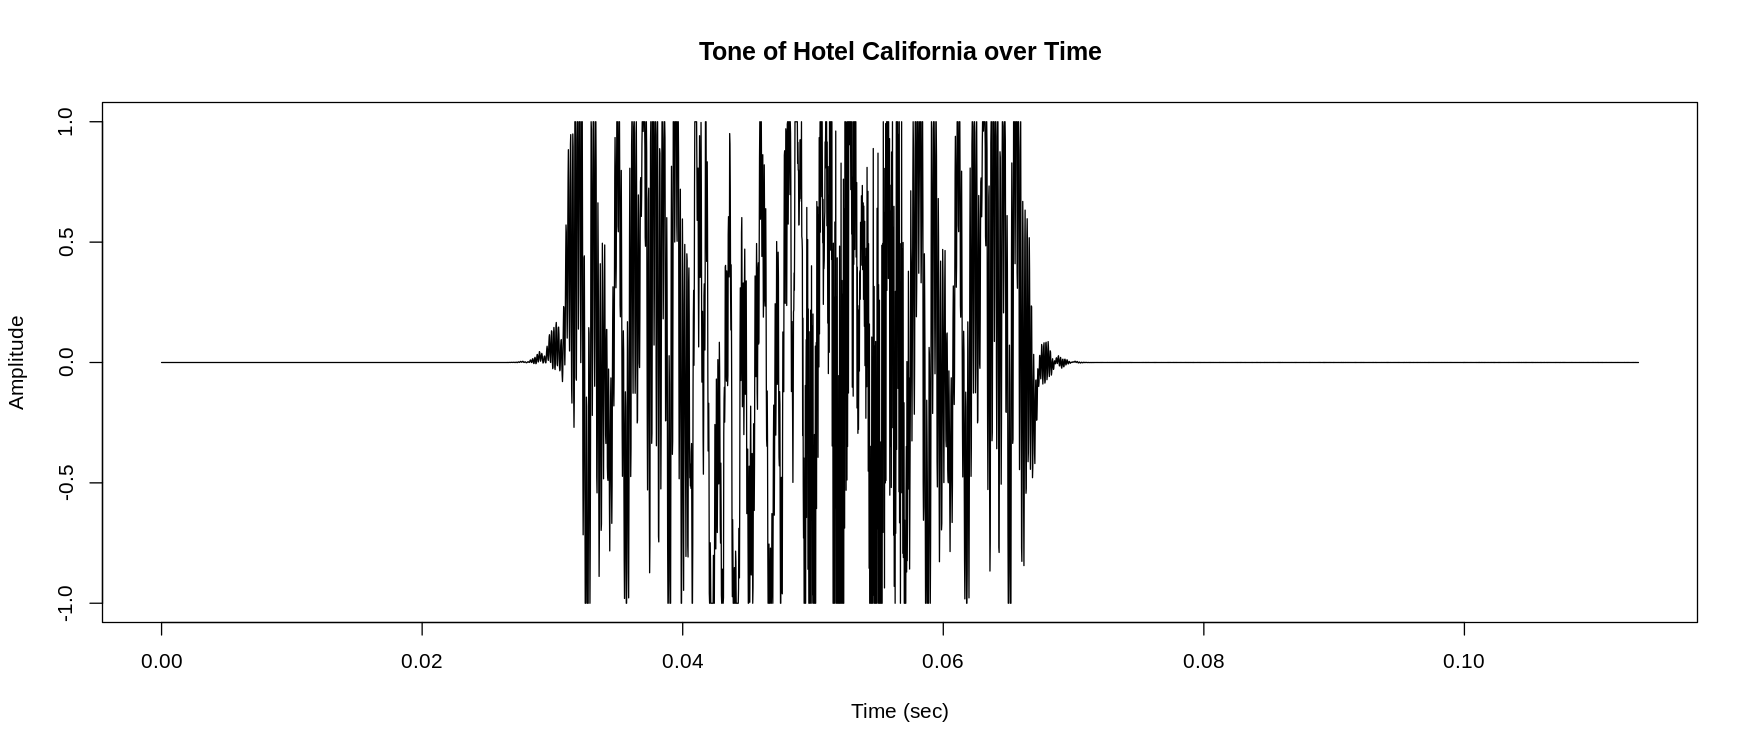

In [ ]:
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(my_time_eagles[1:5000], m1_eagles[1:5000], type='l', col='black', xlab='Time (sec)', ylab='Amplitude', main = "Tone of Hotel California over Time")

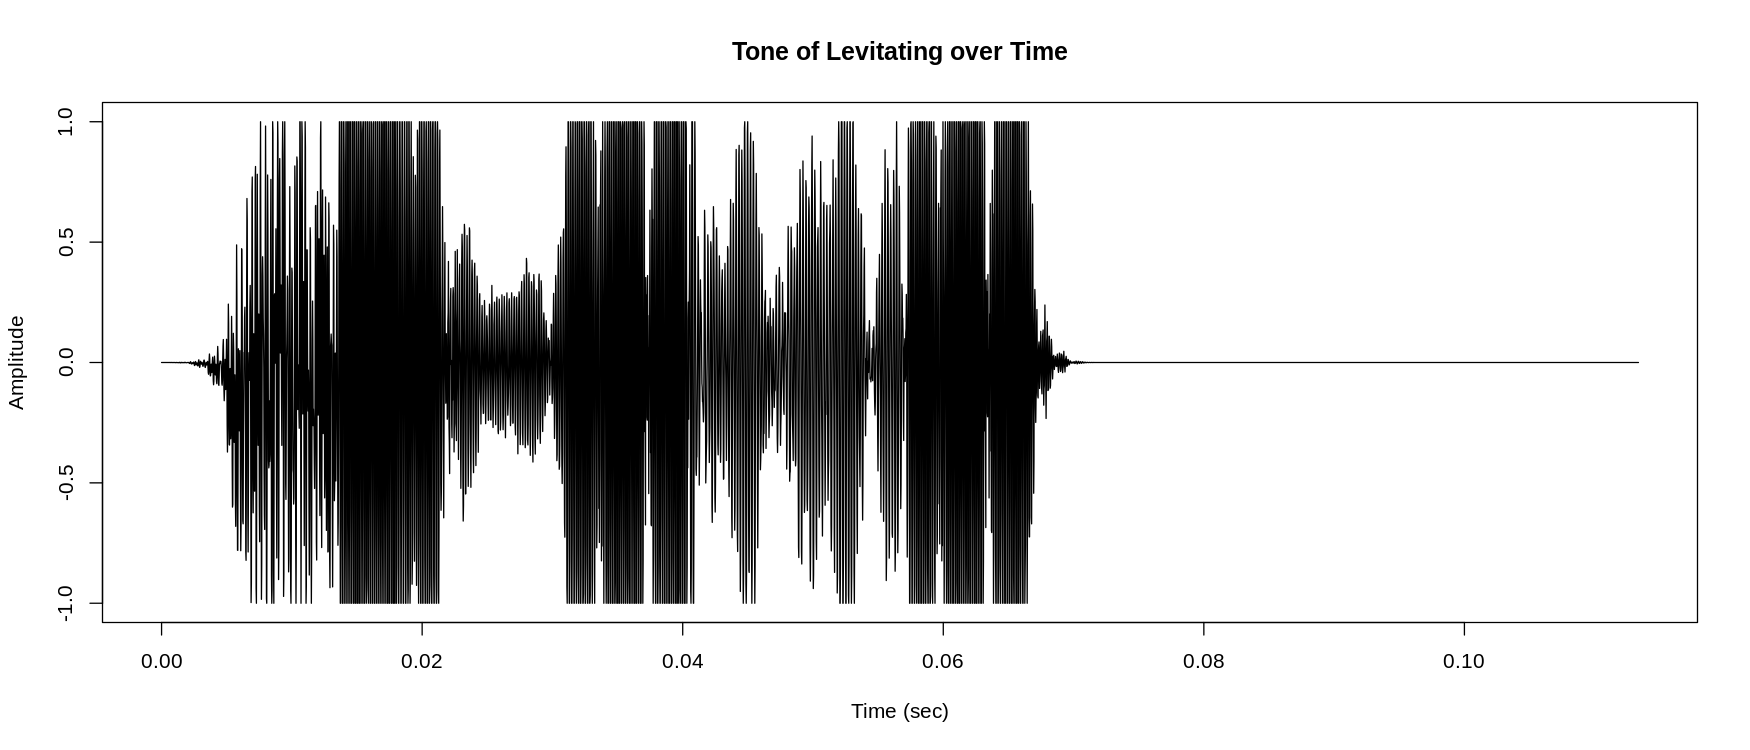

In [ ]:
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(my_time_levitating[1:5000], m1_levit[1:5000], type='l', col='black', xlab='Time (sec)', ylab='Amplitude', main = "Tone of Levitating over Time")

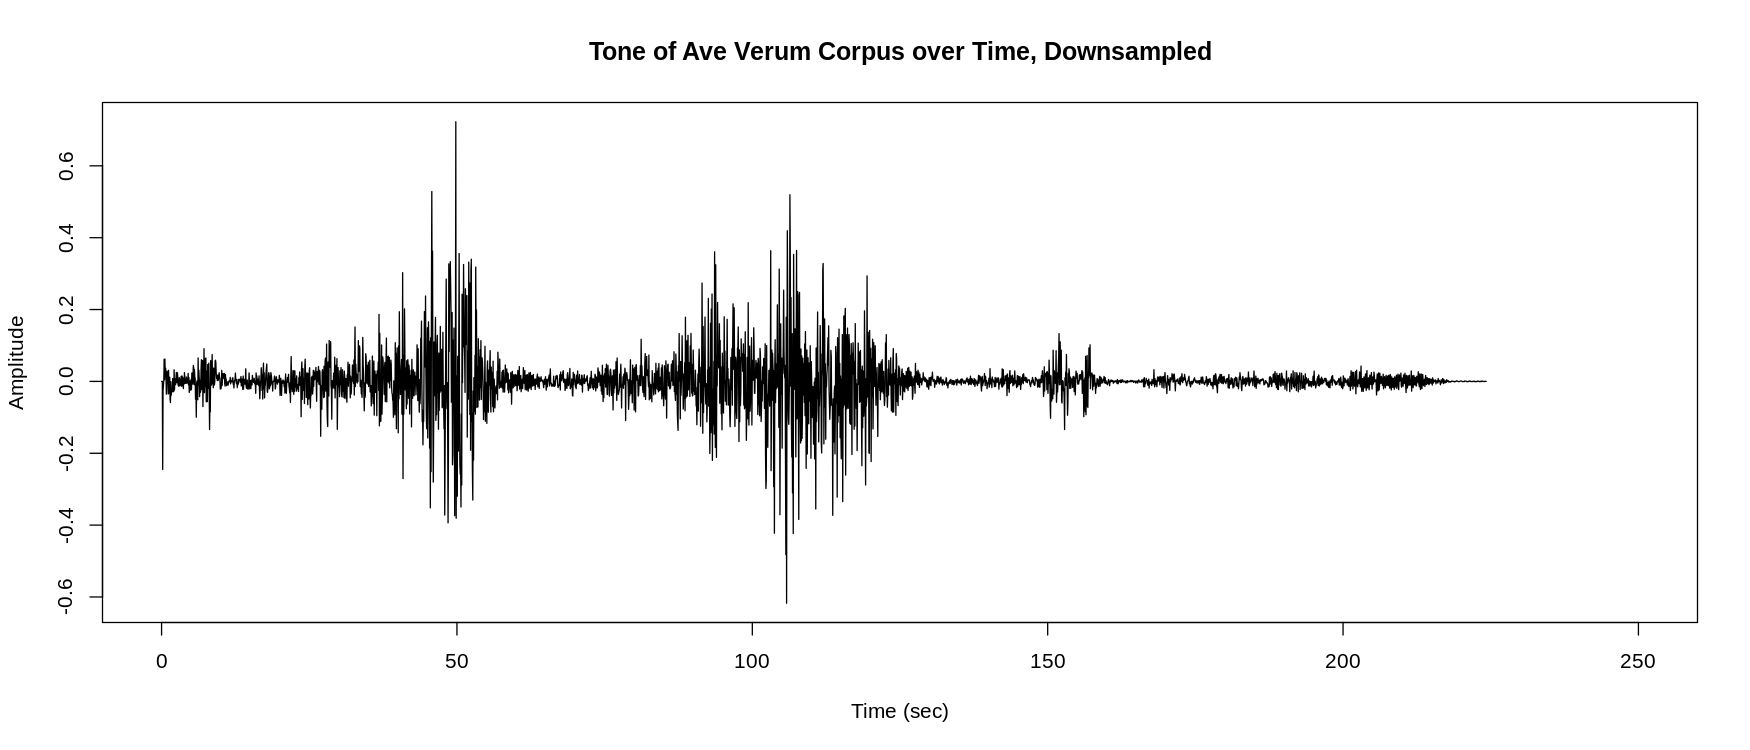

In [ ]:
# Downsampling by 1/16 the sampling rate
my.indx_ave <- seq(1, (num_samples_ave - 1), 2756)
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(my_time_ave[my.indx_ave], m1_ave[my.indx_ave], type='l', col='black', xlab='Time (sec)', ylab='Amplitude', xlim=c(0,250), main = "Tone of Ave Verum Corpus over Time, Downsampled")

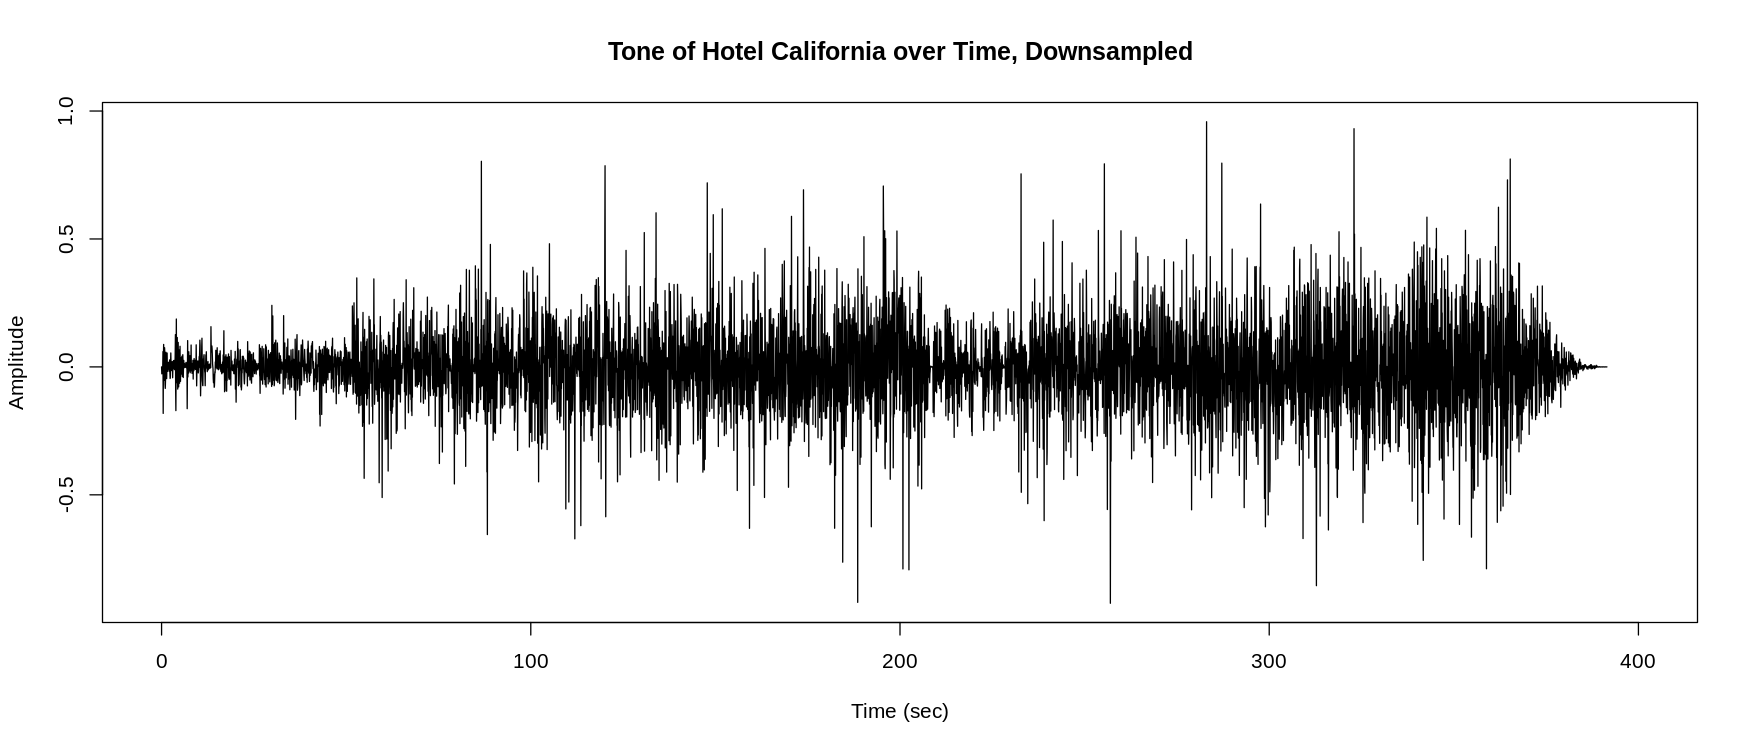

In [ ]:
my.indx_eagles <- seq(1, (num_samples_eagles - 1), 2756)
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(my_time_eagles[my.indx_eagles], m1_eagles[my.indx_eagles], type='l', col='black', xlab='Time (sec)', ylab='Amplitude', xlim=c(0,400), main = "Tone of Hotel California over Time, Downsampled")

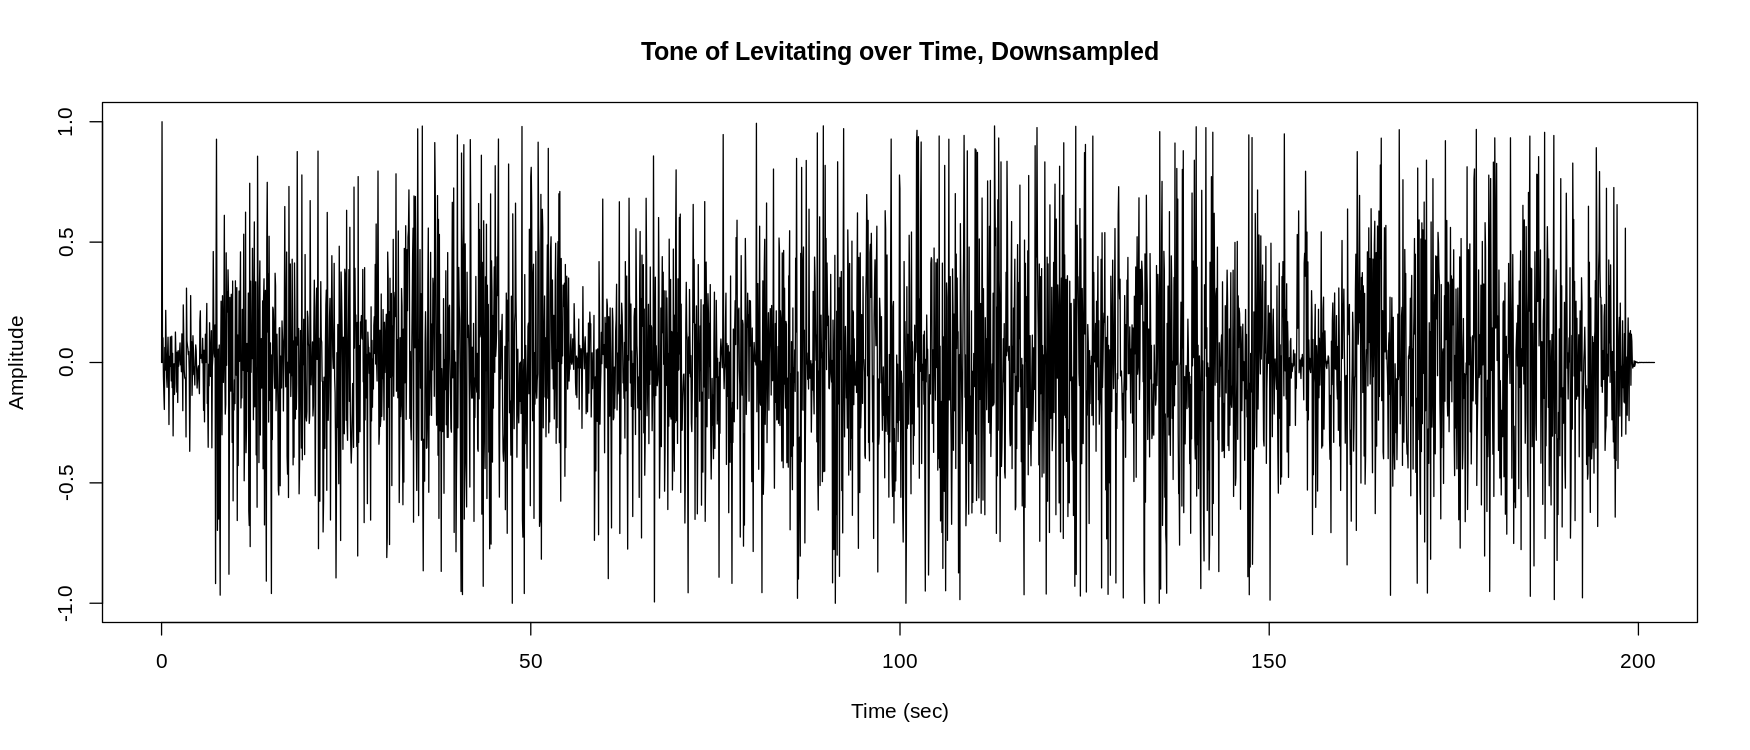

In [ ]:
my.indx_levit <- seq(1, (num_samples_levitating - 1), 2756)
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(my_time_levitating[my.indx_levit], m1_levit[my.indx_levit], type='l', col='black', xlab='Time (sec)', ylab='Amplitude', xlim=c(0,200), main = "Tone of Levitating over Time, Downsampled")

## **Plotting the Frequency Content**
Next, the spectrum of the tone of each song was plotted using the spectrum() function built into R. 

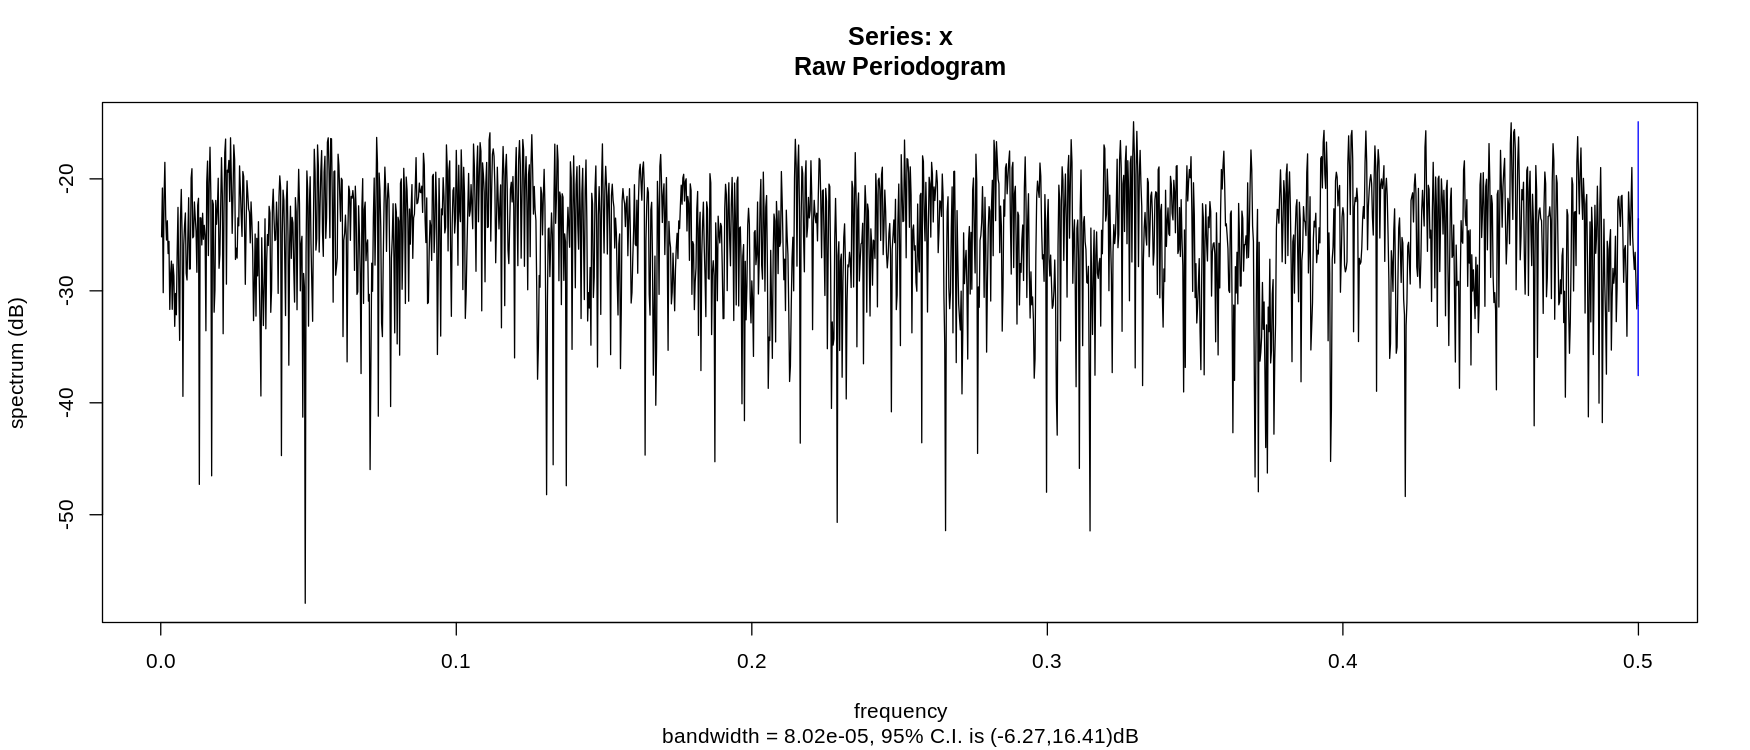

In [ ]:
# Spectrum: Ave Verum Corpus
spectrum(m1_ave[my.indx_ave], log="dB")

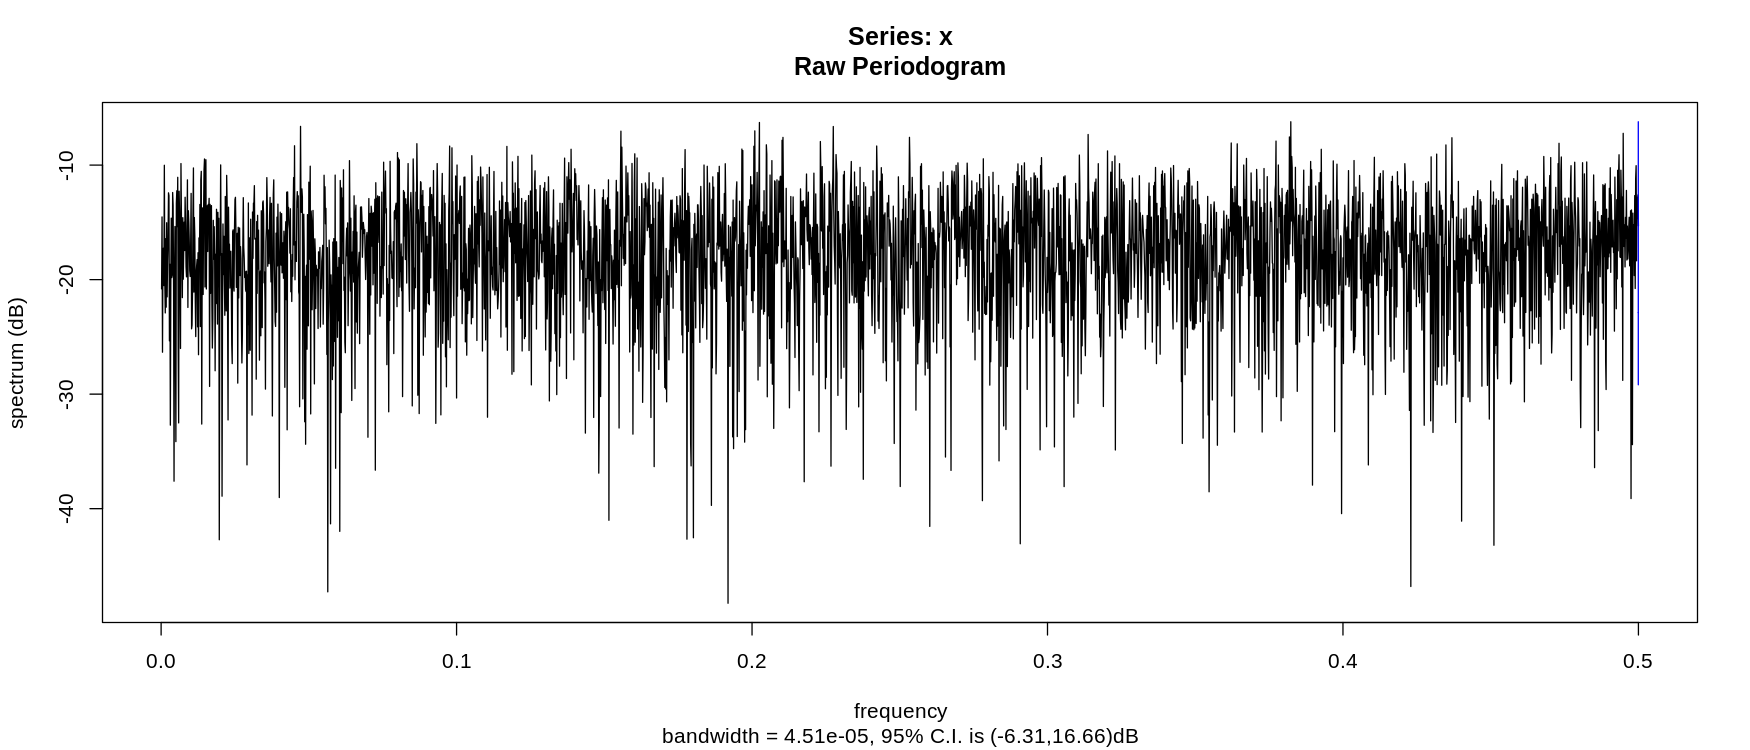

In [ ]:
# Spectrum: Hotel California
spectrum(m1_eagles[my.indx_eagles], log="dB")

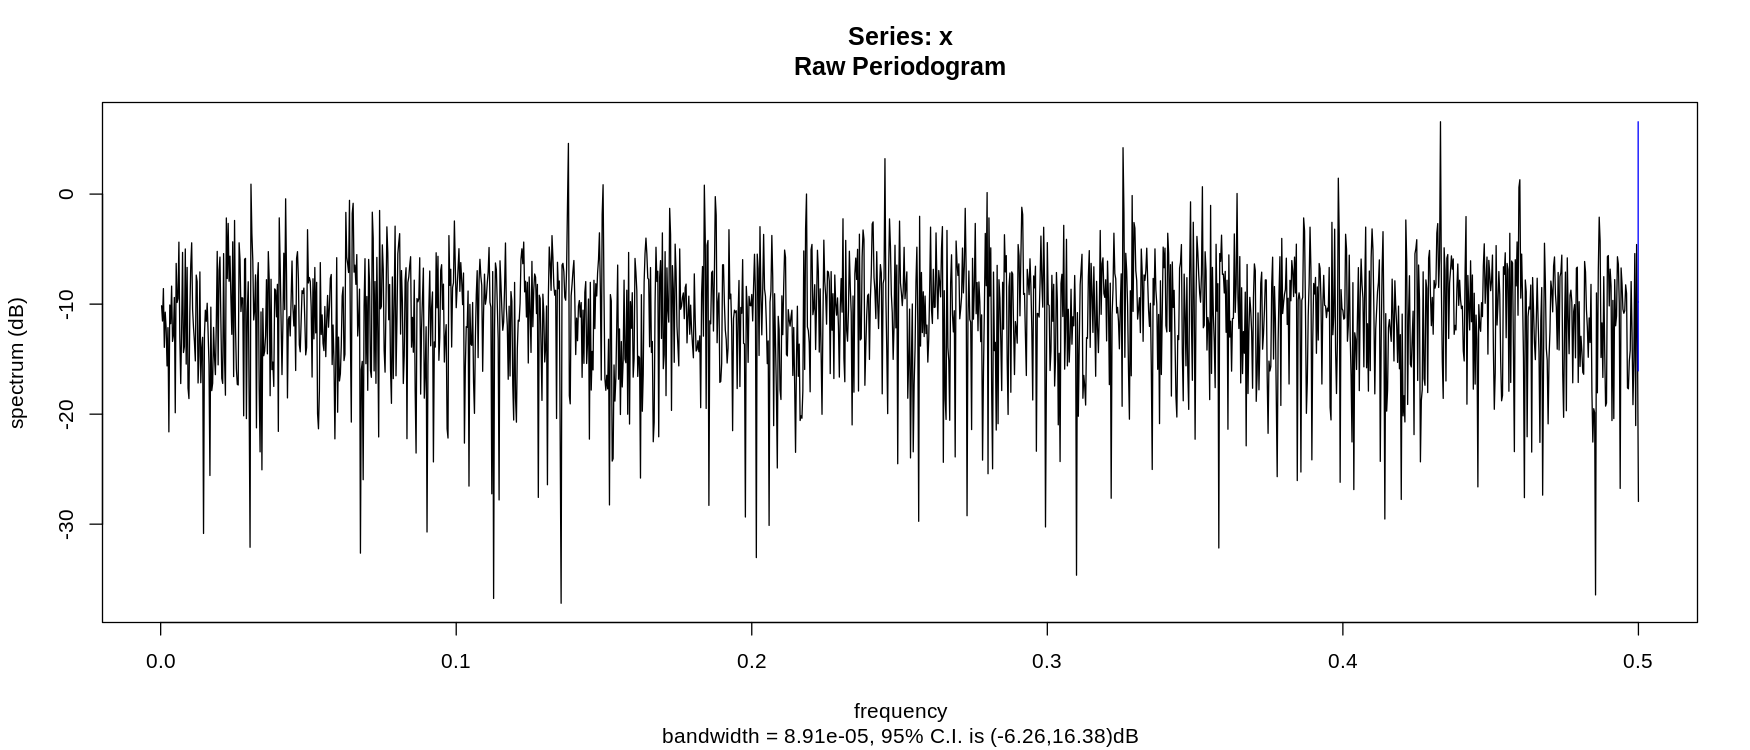

In [ ]:
# Spectrum: Levitating 
spectrum(m1_levit[my.indx_levit], log="dB")

## **Time Series Sample Plots**
Finally, after considering the spectrum of each song, the textbook library called ‘tswge’ (Woodward, tswge) was deployd to create the Realization, Periodogram, Sample Autocorrelations, and the Parzen Window for each song. 

In [ ]:
install.packages("tswge")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘PolynomF’, ‘waveslim’, ‘astsa’




In [ ]:
library("tswge")

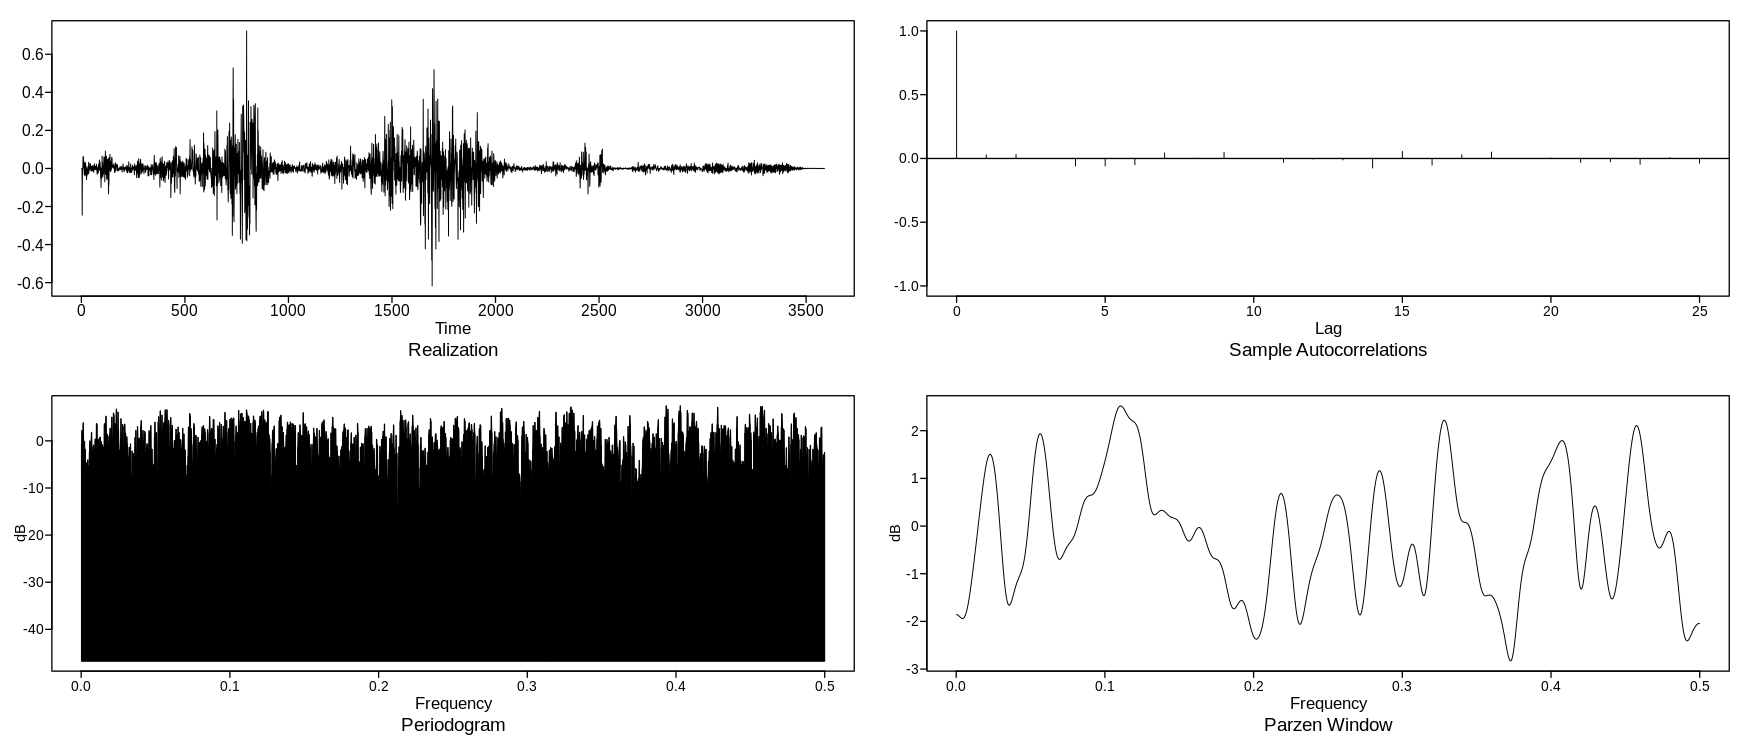

In [ ]:
# Time series sample plots: Ave Verum Corpus
parzen_ave <- plotts.sample.wge(m1_ave[my.indx_ave])

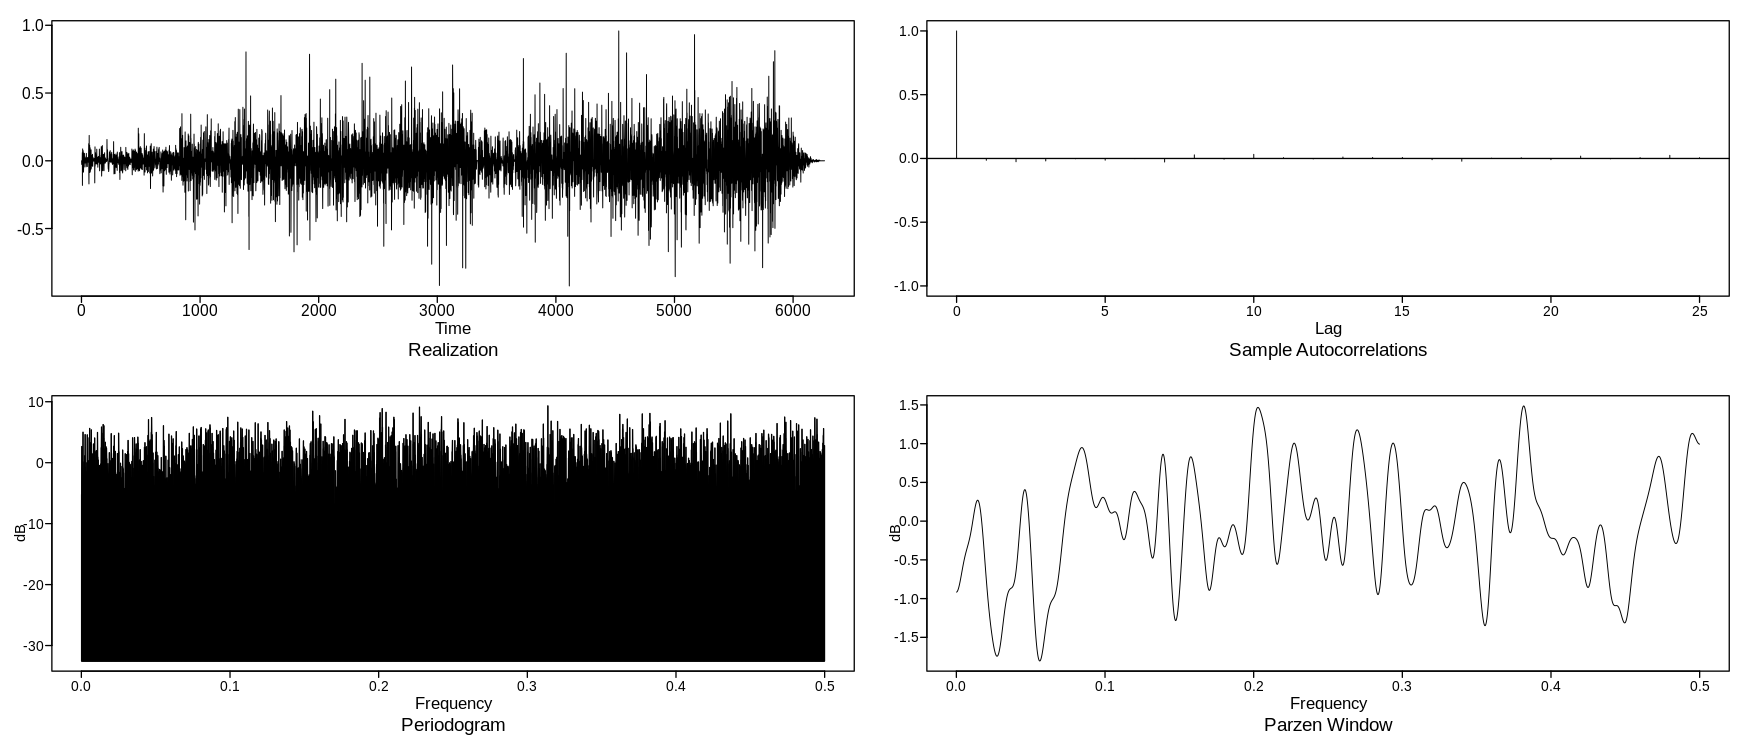

In [ ]:
# Time series sample plots: Hotel California
parzen_eagles <- plotts.sample.wge(m1_eagles[my.indx_eagles])

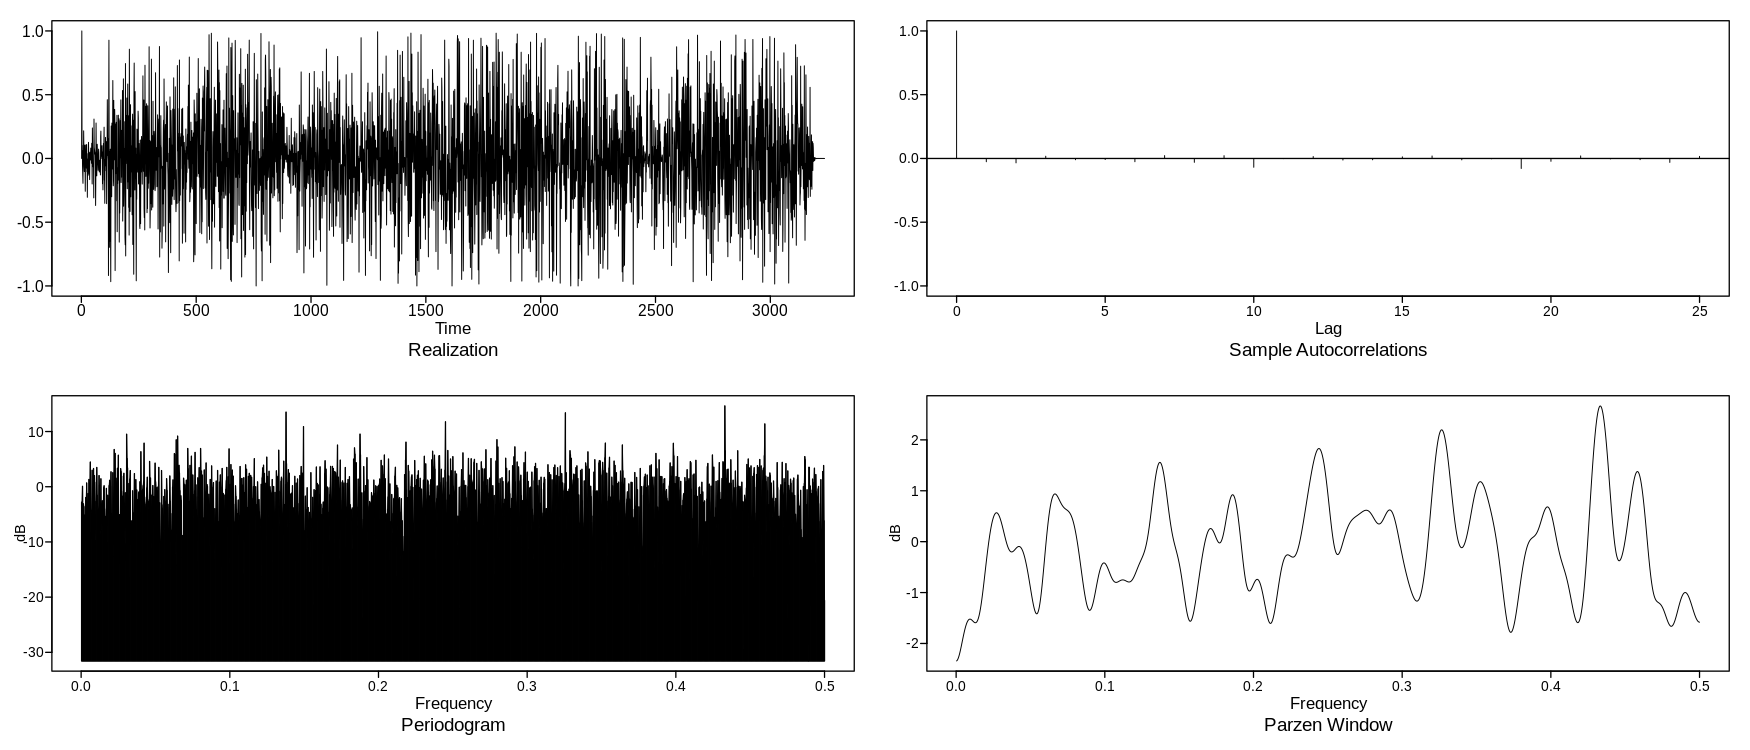

In [ ]:
# Time series sample plots: Levitating
parzen_levit <- plotts.sample.wge(m1_levit[my.indx_levit])

# Discussion and Conclusion 
## **Discussion**
#### Ave Verum Corpus
To evaluate Ave Verum Corpus, we first plotted the tone of the song with no downsampling. This revealed that the song begins immediately at time 0 and ends around time 0.025. However, the peaks were too condensed to analyze. To rectify this, we then downsampled the audio by 1/16. The downsampled plot shows an amplitude range from -0.6-0.6, which is smaller than the other songs. Furthermore, at the 50-second mark, the plot shows an increase in amplitude where the choir crescendos, with three notable spikes for the lyrics 'pro homine' (meaning 'mankind') being repeated three times successively at higher pitches.

Similarly, there is also an increased peak at the 100 second mark. In terms of the history of this song, this is the moment in the piece where the consecration of Eucharist is to occur in a Roman-Catholic mass. This is because this piece is a Eucharistic chant, and thus the second crescendo is describing the Biblical sacrifice of Christ. This is the point in the song where the organ line follows the choir into another peak in the amplitude, where the organ is harmonizing with the choir by decreasing their pitch relative to the choir increasing their pitch.

Next, the spectrum function revealed that the frequency of Ave Verum Corpus is less dense than the other two songs and sits at a lower decibel (-20 to -50). This song is less dense than Levitating and Hotel California because it is only made of the choir and organ sounds, whereas the other songs are made of many different instruments.
The slower, simpler nature of Ave Verum Corpus is also reflected in the parzen window, which has less dominant frequencies than the other songs.

#### Hotel California
Similar to Ave Verum Corpus, the plot of the tone was too densely packed to analyze but did have more space between peaks than Ave Verum Corpus. Once downsample, the tone plot revealed that Hotel California slowly builds in Amplitude and stays fairly steady across the song, except for at time mark 200, where the amplitude decreases significantly. This is a result of a slowed version of the second chorus that is sung in the middle of the song. The amplitude also slowly decreases at the end of the song, representing a guitar solo.
The frequency plot for Hotel California is the most densely packed of the three songs. This is likely due to the consistent presence of many instruments like the guitar throughout the song.
The parzen window also reflects the high-intensity nature of Hotel California as the plot has the most peaks out of all of three songs' parzen windows.

#### Levitating
Like the other two songs, the tone plot of Levitating is very densely packed; however, it also shows various blocks where the sound has different levels of amplitude. This is reflective of the stop-and-go nature of the song, where it has different speeds and rhythms at different sections of the song. Downsampled, the tone plot for Levitating has the largest range of amplitude, and its peaks are the most consistent across the plot of all of the songs.
The frequency plot reveals that Levitating sits in the highest decibel range of all of the songs. Its peaks are less densely packed than Hotel California but more packed than Ave Verum Corpus. This is because the song has more production than Ave Verum Corpus, but has fewer high-intensity instruments than Hotel California.
This is also reflected in the parzen window, wherein Levitating has more peaks than Ave Verum Corpus but less than Hotel California. There is also a general trend of the parzen window peaks having a high decibel as the frequency increases, creating an upward slope.

### Realizations
We wanted to explore how songs from different time periods and different genres can differ. What we have found is that the oldest piece seems to show two strong moments represented in the realization, while the density of each realization increases over time. We see this when looking at the realizations and observing the range of tones covered in a short section of time becomes much greater as we progress to each song chronologically. To understand why this happens, we must reflect on how each song was recorded. 

For Ave Verum Corpus, this audiofile was recorded by the Choir of the Liverpool Metropolitan Cathedral. This entails that the file itself was recorded by microphone in the Cathedral, so both the choir and church organ could be captured together. The song is only composed of two different lines: the organ and the choir. Thus, the audio file records any reverberation from the cathedral sound stage produced by these two lines.. 

Hotel California, on the other hand, is a compilation of a variety of instruments: from 12 and 6 string electric and acoustic guitars, percussions, bass, and four different vocal lines throughout the song. This greater variety in instruments composing the song could be contributing to the greater range of tones covered. Also, the song itself was recorded in a sound studio, so the isolation of sound from this could have an effect on what we see in the realization.

Finally, Levitating is a modern song composed by a pop artist. The song is an electronic-disco song. Much of the audio one hears in the song is digitally composed through different syhthesizers with looping sound. Voice lines from both Dua Lipa, Da Baby, and various background vocalists can also be heard throughout the song. This givens a wide range of sound to be covered by the song, and this can be easily noted in the realization. Furthermore, the digital construction of much of the audio could also explain why the range of amplitude covered is so wide when compared to the other songs. 

## **Conclusion**
Overall, there are visible differences between the audio files from these three songs. Ave Verum Corpus' plots demonstrate a slower, less produced song. This is reflective of the typical choir-based, religious music of the time. As opposed to Hotel California and Levitating, Ave Verum Corpus is in the style of a eucharistic chant, making it less repetitive and thus giving it a less periodic time realization. As music has modernized, more instruments and digitalized production techniques have been added to songs. As a staple song of the '70s, Hotel California's audio files have illustrated the general patterns of the high-intensity, fairly repetitive, and instrument-heavy rock genre. Lastly, Levitating's plots reflect the modern movement towards a catchy, repetitive structure and highly produced, digital sounds.


## **Challenges**
The first challenge encountered during this lab was accessing the audio files. The songs were originally downloaded as .flac files and then converted to a .mp3 format. During this process, audio at higher frequencies was decreased. While this should not significantly impact the analysis, it is important to note. The conversion from .flac to .mp3 allowed for the data to be read into R and separated into the left and right audio channels. The left channel, containing monophonic sound, was utilized in the analysis for two reasons. The primary reasoning was that it is common practice to utilize the left channel. Additionally, according to the R documentation for the tuneR package, when the right channel in a song is missing, it is replaced by the values from the left channel. This was not the case in these particular songs, but was an influencing factor in the decision. With both the left and right channels, the values for approximately the first 1000 of observations are 0. The number of observations for all three songs is greater than 8,916,864 so the impact is negligible. Another challenge that was encountered was creating a visual plotting amplitude and time. The data was too condensed and therefore couldn’t be clearly seen or interpreted. This obstacle was resolved by increasing the plot width so the data could be better visualized. An additional aspect of the songs we hoped to analyze was the dominant frequencies of the song utilizing the parzen window. However, the graph shows a very high number of dominant frequencies. If we have more time, it would be interesting to do more research and explore the possibility of altering the sensitivity of the parzen window. This may allow for fewer and stronger dominant frequencies to appear and would add significant information to the analysis. 


# References

* “500 Greatest Songs of All Time.” Rolling Stone, Rolling Stone, 22 Sept. 2020, www.rollingstone.com/music/music-lists/500-greatest-songs-of-all-time-151127/the-eagles-hotel-california-67578/.
* Ahlgrim, Callie. “The 16 best songs of 2020, so far”. Business Insider. Australia, 15 Sept. 2020, https://www.businessinsider.com.au/best-songs-released-this-year-2020-9
* “Ave verum corpus (Mozart), Wikipedia, Wikimedia, 24 August 2020. https://en.wikipedia.org/wiki/Ave_verum_corpus_(Mozart)
* “FLAC to MP3 Converter.” CloudConvert, Lunaweb GmbH, 2021, https://cloudconvert.com/flac-to-mp3. 
* Kojevnikov, Alexander. “Spek.” Spek, 0.8.2, 24 Feb. 2013, https://github.com/alexkay/spek#readme. 
* “Levitating (song)”. Wikipedia, Wikimedia Foundation, 30 April 2021, https://en.wikipedia.org/wiki/Levitating_(song). 
* Philpot, Larry. “The Eagles' ‘Hotel California’ Song Analysis.” OnStage Magazine.com, 16 Oct. 2016, onstagemagazine.com/eagles-hotel-california-song-analysis/.
* R Core Team (2021). R: A language and environment for statistical computing. R Foundation for Statistical Computing, Vienna, Austria. URL https://www.R-project.org/.
* Schwarm, Betsy. "Ave Verum Corpus, K 618". Encyclopedia Britannica, 30 May. 2016, https://www.britannica.com/topic/Ave-Verum-Corpus-K-618. 
* TIDAL, Aspiro AB, 2021, https://tidal.com/. 
* Uwe Ligges, Sebastian Krey, Olaf Mersmann, and Sarah Schnackenberg (2018). tuneR: Analysis of Music and Speech. URL: https://CRAN.R-project.org/package=tuneR
* Wayne Woodward (2016). tswge: Applied Time Series Analysis. R package version 1.0.0. https://CRAN.R-project.org/package=tswge
* Yaronzz. “Tidal-Gui.” Tidal-Media-Downloader-PRO, v1.2.1.3, 22 Feb. 2021, https://github.com/yaronzz/Tidal-Media-Downloader-PRO. 







